# Housing Prices

### Import Libraries

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler, normalize
import matplotlib.pyplot as pt 

### Analysing the Data

In [2]:
df = pd.read_csv('Data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#columns Name
df.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [4]:
#data shape or size 
df.shape

(1460, 81)

In [14]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Data preprocessing

#### Handle the null rows

In [5]:
#check the null rows
pd.DataFrame(df.isnull().sum())

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [6]:
df.fillna(0, inplace=True)

In [7]:
pd.DataFrame(df.isnull().sum())

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


#### Data Spliting

In [113]:
#transform string data to binary 0 or 1
tdf = pd.get_dummies(df, dtype=float)
X = np.asanyarray(tdf.drop(["SalePrice"], axis=1))
Y = np.asanyarray(tdf.SalePrice)

In [114]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) 

#### Scaling data

In [115]:
scale_std = StandardScaler()
x_train_scaled = scale_std.fit_transform(pd.DataFrame(x_train))
y_train_scaled = scale_std.fit_transform(pd.DataFrame(y_train)) 


In [116]:
pd.DataFrame(x_train_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,294,295,296,297,298,299,300,301,302,303
count,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,...,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03,1.022000e+03
mean,9.038215e-17,5.561978e-17,4.866731e-17,9.125121e-17,7.300097e-17,6.778661e-17,-2.309959e-15,5.144830e-15,1.390495e-17,2.607177e-17,...,-1.738118e-18,8.951309e-17,2.085742e-17,-1.016799e-16,-1.216683e-17,-2.433366e-17,-3.476236e-17,3.302425e-17,1.320970e-16,2.085742e-17
std,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,...,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00
min,-1.718161e+00,-8.689496e-01,-1.601542e+00,-8.340925e-01,-3.741231e+00,-4.112182e+00,-3.221053e+00,-1.676106e+00,-6.085467e-01,-9.704838e-01,...,-5.425922e-02,-2.992528e-01,-3.129588e-02,-2.631061e+00,-2.669809e-01,-6.268391e-02,-7.011719e-02,-1.300593e-01,-2.170138e+00,-3.011894e-01
25%,-8.571287e-01,-8.689496e-01,-4.833730e-01,-2.809192e-01,-8.230565e-01,-5.086236e-01,-5.855158e-01,-9.045367e-01,-6.085467e-01,-9.704838e-01,...,-5.425922e-02,-2.992528e-01,-3.129588e-02,3.800748e-01,-2.669809e-01,-6.268391e-02,-7.011719e-02,-1.300593e-01,4.608003e-01,-3.011894e-01
50%,7.427307e-03,-1.655306e-01,1.455973e-01,-1.011494e-01,-9.351293e-02,-5.086236e-01,3.269669e-02,4.457096e-01,-6.085467e-01,-1.221895e-01,...,-5.425922e-02,-2.992528e-01,-3.129588e-02,3.800748e-01,-2.669809e-01,-6.268391e-02,-7.011719e-02,-1.300593e-01,4.608003e-01,-3.011894e-01
75%,8.649353e-01,3.034154e-01,6.068421e-01,8.363168e-02,6.360307e-01,3.922660e-01,9.762842e-01,9.279405e-01,3.771695e-01,6.042985e-01,...,-5.425922e-02,-2.992528e-01,-3.129588e-02,3.800748e-01,-2.669809e-01,-6.268391e-02,-7.011719e-02,-1.300593e-01,4.608003e-01,-3.011894e-01
max,1.709522e+00,3.117091e+00,7.148133e+00,1.805862e+01,2.824662e+00,3.094935e+00,1.269122e+00,1.217279e+00,7.381553e+00,1.130586e+01,...,1.843005e+01,3.341656e+00,3.195309e+01,3.800748e-01,3.745586e+00,1.595306e+01,1.426184e+01,7.688800e+00,4.608003e-01,3.320170e+00


### Training the model

In [164]:
reg = SGDRegressor()
p_grids = {
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],    
    'penalty': ['l2', 'l1', 'elasticnet'],
    'loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
}
model = GridSearchCV(estimator=reg, param_grid=p_grids, cv=3)
model.fit(x_train_scaled ,y_train_scaled.ravel())

C:\Users\micro\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\micro\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\micro\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\micro\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\micro\anaconda3\Lib\site-packages\sklearn\linea

GridSearchCV(cv=3, estimator=SGDRegressor(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['squared_error', 'huber',
                                  'epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
                         'penalty': ['l2', 'l1', 'elasticnet']})

In [165]:
pred = model.predict(x_test)

In [166]:
model.best_score_

0.8276670148641928

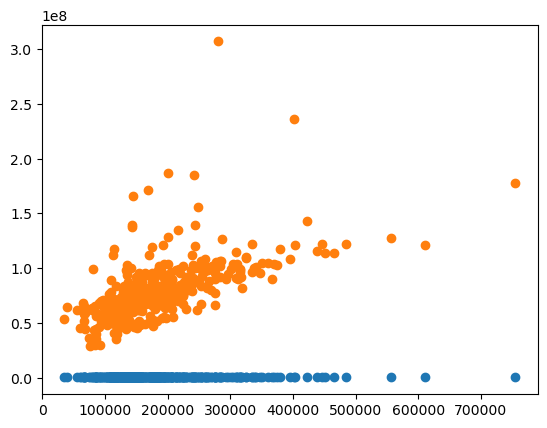

In [167]:
pt.scatter(y_test, y_test)
pred = scale_std.inverse_transform(pd.DataFrame(pred))
pt.scatter(y_test, pred)